This script fits a machine learning algorithem on relative abundance table based on 5 fold cross validatio and plots confution matrix and coefficent values of ASVs

In [4]:
# import libreries
import  pandas as pd , os as os , seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import svm

In [5]:
# read input file
data = pd.read_csv("../data/data.txt", sep='\t', header=0, index_col=0)
data.head()


,ASV1_Mesorhizobium,ASV10_Mesorhizobium,ASV1018_Mesorhizobium,ASV1032_unknown,ASV104_Mesorhizobium,ASV1049_unknown,ASV106_Mesorhizobium,ASV108_Mesorhizobium,ASV109_Mesorhizobium,ASV11_unknown,...,ASV91_Mesorhizobium,ASV920_ANPR,ASV93_ANPR,ASV95_ANPR,ASV954_unknown,ASV97_ANPR,ASV974_Mesorhizobium,ASV98_unknown,ASV984_Aminobacter,target
sample,,,,,,,,,,,,,,,,,,,,,
Lb_1_Healthy_A,0.889959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,H1
Lb_1_Healthy_B,0.367677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000108,0.0,0.0,H1
Lb_1_Healthy_C,0.444386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,H1
Lb_1_Healthy_D,0.961424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001236,0.000014,...,0.0,0.000065,0.0,0.0,0.0,0.001127,0.000000,0.0,0.0,H1
Lb_1_Healthy_E,0.596170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,H1


In [6]:
data["target"].value_counts()

H2    17
H1    14
S2    13
Name: target, dtype: int64

In [7]:
data = data[data['target'].str.contains('H1')== False] #keep only Healthy2 and starved2 samples
data["target"].value_counts()


H2    17
S2    13
Name: target, dtype: int64

In [8]:
LabelEncoder = LabelEncoder()
data["targetN"] = LabelEncoder.fit_transform(data["target"])  #H = 0 , I = 1 encode targets to numeric format
data["targetN"].value_counts()

0    17
1    13
Name: targetN, dtype: int64

In [9]:
X = data.drop(["target","targetN"], axis=1)  # remove last column lable from data
y = np.array(data["targetN"]) #use numeric labaling for data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

fold = 1 
 TRAIN samples: [22  5 16  8 14 23 20  1 29  6  4 18 19  9  7 25  3  0 21 15 12] TEST samples: [ 2 28 13 10 26 24 27 11 17]
classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



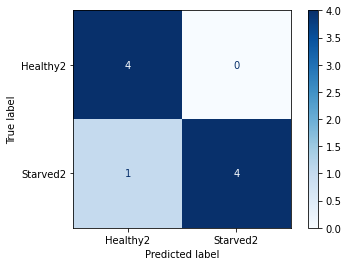

fold = 2 
 TRAIN samples: [25 26  4 10 23 28  9  1 27  7 14 21 22 19 17 24  3 18  0 29 15] TEST samples: [ 5 16 20  6 13  8 11 12  2]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



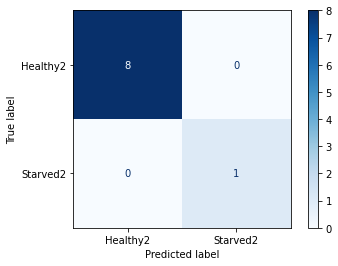

fold = 3 
 TRAIN samples: [16  0 13  2 11 18 28  3 22  7 26  1 10  9  4 15 17 20  8  6  5] TEST samples: [24 27 21 25 14 12 19 23 29]
classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.71      0.83         7

    accuracy                           0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9



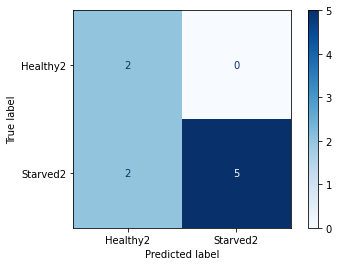

fold = 4 
 TRAIN samples: [11 21  0 19  9  5  1 16 13 23 26 28 14  8 27 29 12  3 20 15  4] TEST samples: [25  6 10 22 17  7 24  2 18]
classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



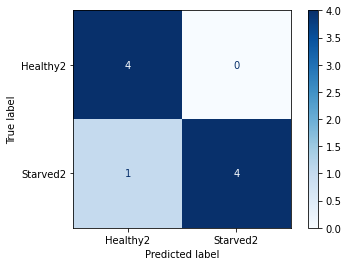

fold = 5 
 TRAIN samples: [29 25 26 19  1  4 17 14 22  3 20  2 11 18 10  0  9 21  7 16 13] TEST samples: [ 8 23 27  5 24 15  6 12 28]
classification report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



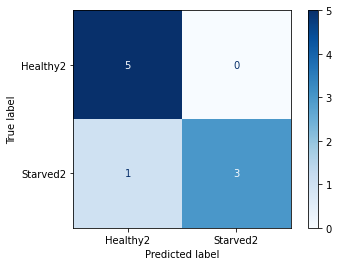

In [11]:
# define the model
clf = svm.SVC(kernel="linear")
# keep confution matrix of each fold in array
conf_matrix_list_of_arrays = [] 
#Random permutation cross-validator
kf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
# counter
cv_count = 0
# data frame for saving coefficient of each fold
coef_final = pd.DataFrame()
# loop for train and test the model based on split of "kf"
for train_index, test_index in kf.split(X):
    cv_count += 1
    # print index of samples in each fold for train and test
    print("fold =" , cv_count , "\n", "TRAIN samples:", train_index, "TEST samples:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # get train and test from main data frame(X)
    y_train, y_test = y[train_index], y[test_index] # get label of train and test data
    clf.fit(X_train, y_train) # fit the model
    #print("confusion_matrix: \n" ,confusion_matrix(y_test, clf.predict(X_test))) # print confution matix 
    print("classification report:\n",classification_report(y_test,clf.predict(X_test)))
    class_names = ["Healthy2", "Starved2"]  # "Healthy" class 0 and "Starved" = class 1
    titles_options = [("Confusion matrix" + " SVM ", None), ("Normalized confusion matrix", 'true')]
    # Plotting all the subplots
    conf_matrix = confusion_matrix(y_test, clf.predict(X_test)) #confusion_matrix
    conf_matrix_list_of_arrays.append(conf_matrix) #keep confusion_matrix of each fold
    coefficient = pd.DataFrame(data=np.transpose(clf.coef_),index=X.columns,columns=["H2S2"]) #coefficente vector
    coefficient["CV"] = cv_count #add a new column 'CV'
    coefficient = coefficient.sort_values("H2S2", ascending=False) # sort coefficient scores
    coef_final = pd.concat([coef_final, coefficient]) # concat coefficent scores 
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues)

    plt.show()

In [12]:
# print mean of all confution matrixes
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print("mean of 10 confuctin matrixes: " + "\n" , mean_of_conf_matrix_arrays)

mean of 10 confuctin matrixes: 
 [[4.6 0. ]
 [1.  3.4]]


In [13]:

scores = cross_val_score(clf, X, y, cv=kf)
print(scores) # accurecy
print("%0.2f is mean of accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


[0.88888889 1.         0.77777778 0.88888889 0.88888889]
0.89 is mean of accuracy with a standard deviation of 0.07


In [14]:
# save and visulize coefficent scores of ASVs in each fold
coef_final["ASV"] = coef_final.index
coef_final.to_csv("H2S2_SVMCV5Featureimportance.csv")
mean_coeffs = coef_final.groupby(['ASV']).mean() #mean of coeff score per ASVs from all 5 folds
mean_coeffs_sort = mean_coeffs.sort_values("H2S2", ascending=True)
mean_coeffs_sort.drop(columns=["CV"] , inplace = True)
mean_coeffs_sort.to_csv("H2S2_SVMCV5Featureimportance_mean.csv")

mean_coeffs_sort


,H2S2
ASV,
ASV1_Mesorhizobium,-1.778674
ASV28_Pseudomonas,-0.018096
ASV57_Pseudomonas,-0.008530
ASV119_Rhizobacter,-0.005824
ASV156_Duganella,-0.003252
...,...
ASV11_unknown,0.057355
ASV22_Mesorhizobium,0.068139
ASV9_ANPR,0.081844


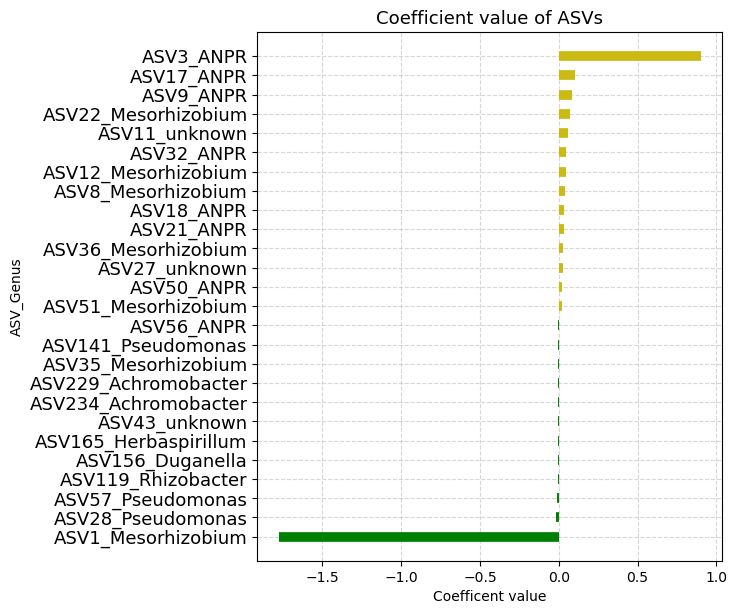

In [25]:
# Draw plot
mean_coeffs_sort['colors'] = ['green' if x < 0 else '#c9ba14' for x in mean_coeffs_sort['H2S2']]
subset_mean_coeffs_sort = mean_coeffs_sort[(mean_coeffs_sort['H2S2'] > 0.02)  | (mean_coeffs_sort['H2S2'] < -0.0021)]
plt.figure(figsize=(6,7), dpi= 100) 
plt.hlines(y=subset_mean_coeffs_sort.index, xmin=0, xmax=subset_mean_coeffs_sort.H2S2, linewidth=7 , color=subset_mean_coeffs_sort.colors)
plt.gca().set(ylabel='ASV_Genus', xlabel='Coefficent value')
plt.yticks(subset_mean_coeffs_sort.index, fontsize=13)
plt.title('Coefficient value of ASVs', fontdict={'size':13})
plt.grid(linestyle='--', alpha=0.5)
plt.savefig("coef_H2S2.png" , dpi = 100 ,  bbox_inches='tight')
plt.show()